In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Diwali Sales Data.csv")
df.shape

(11251, 15)

In [ ]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [ ]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

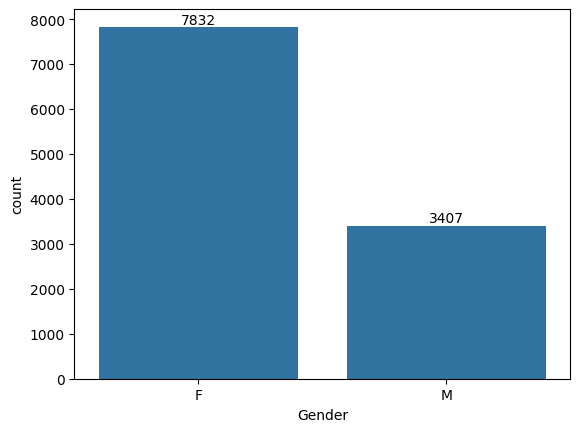

In [ ]:
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
  df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [ ]:
df.dropna(inplace=True)
df["Amount"]=df["Amount"].astype("int")

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.rename(columns={"Product_Category":"Prod_Cat","Product_ID":"Prod_ID"},inplace=True)

<Axes: xlabel='Gender', ylabel='Amount'>

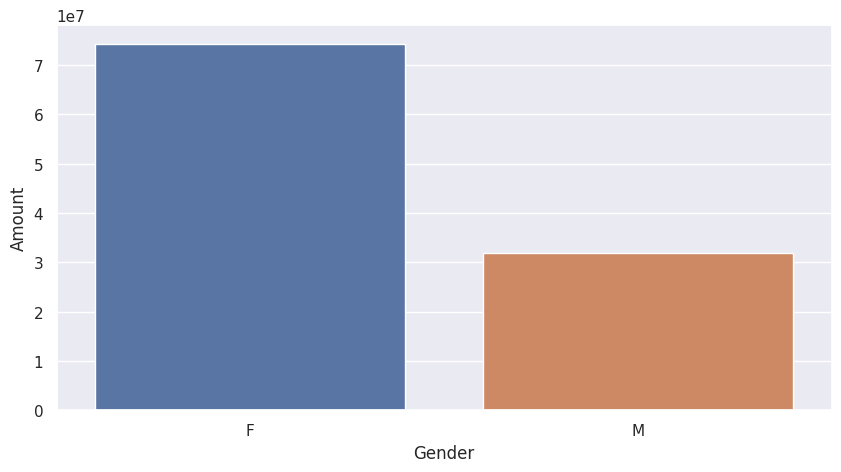

In [ ]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Gender",y="Amount",data=sales_gen,hue="Gender")

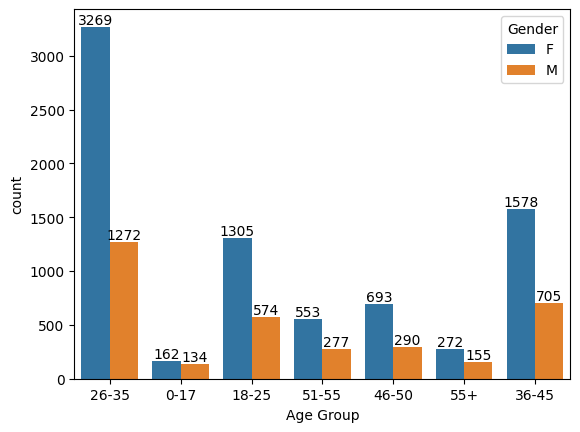

In [ ]:
ax=sns.countplot(data=df,x="Age Group",hue="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

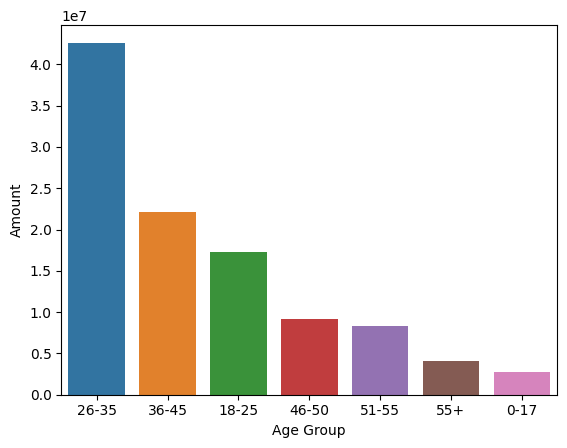

In [ ]:
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sales_age,hue="Age Group")

<Axes: xlabel='State', ylabel='Orders'>

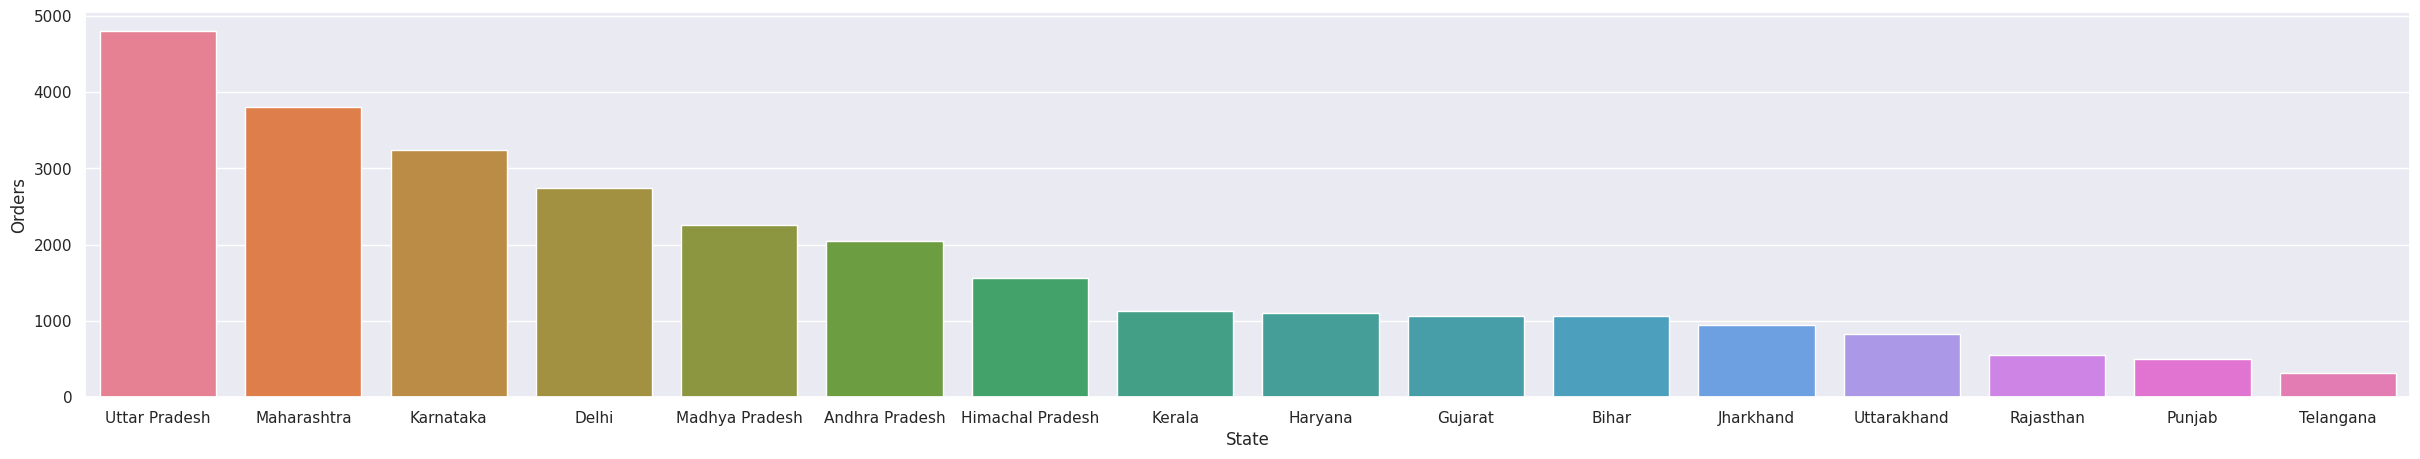

In [ ]:
sales_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(x="State",y="Orders",data=sales_state,hue="State")

<Axes: xlabel='State', ylabel='Amount'>

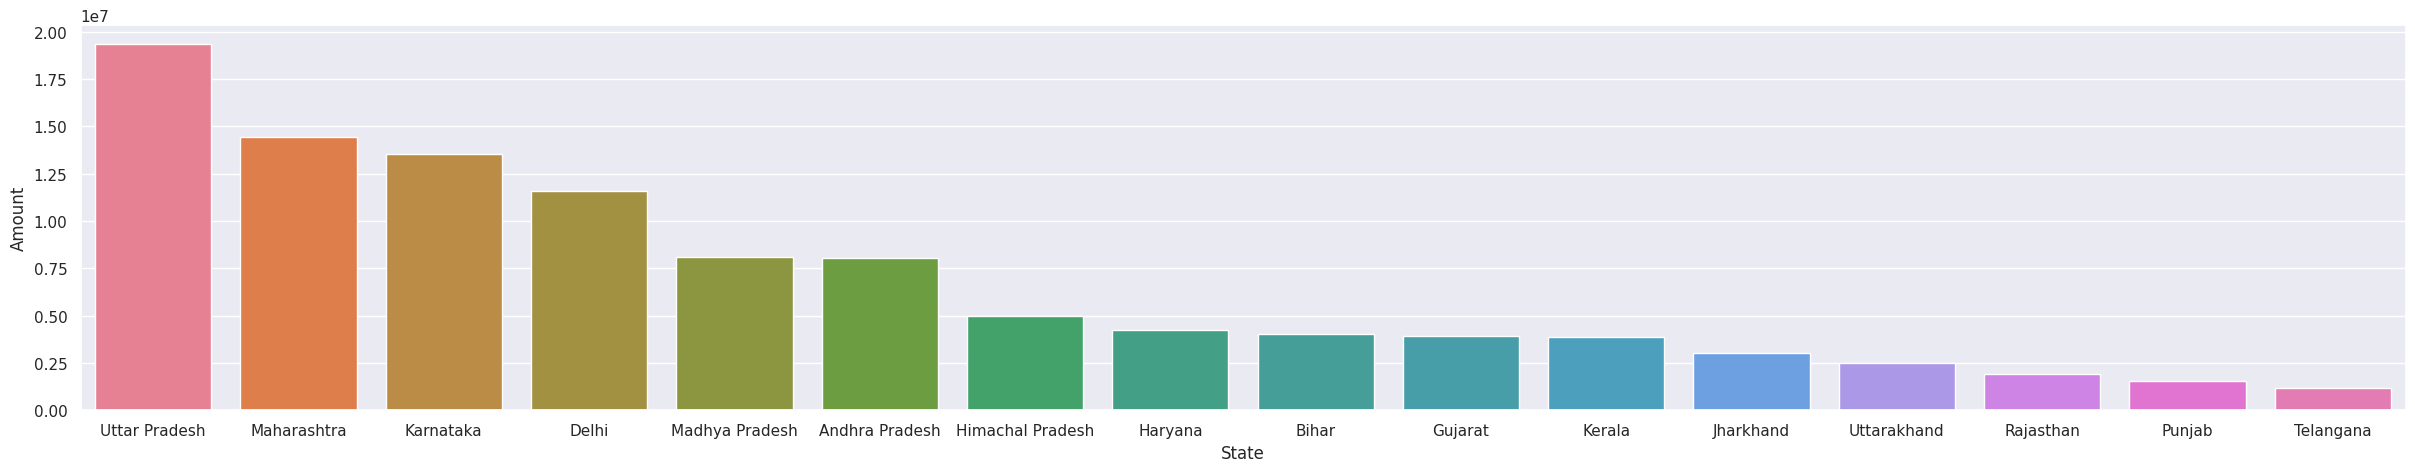

In [ ]:
sales_state=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(x="State",y="Amount",data=sales_state,hue="State")

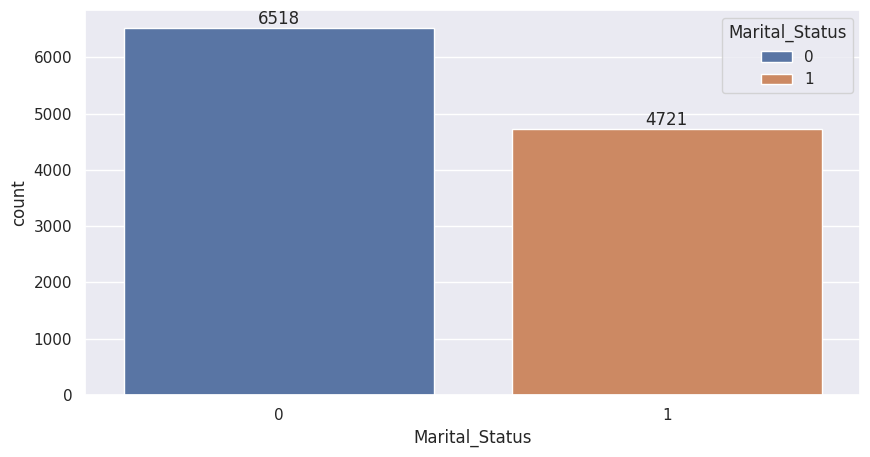

In [ ]:
ax=sns.countplot(data=df,x="Marital_Status",hue="Marital_Status")
sns.set(rc={"figure.figsize":(10,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

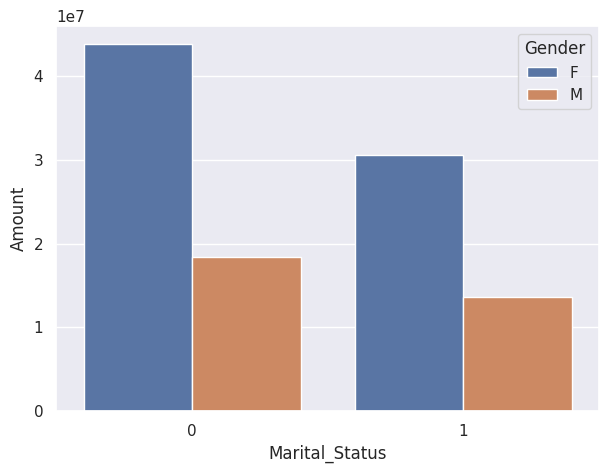

In [ ]:
sales_mars=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(7,5)})
sns.barplot(x="Marital_Status",y="Amount",data=sales_mars,hue="Gender")

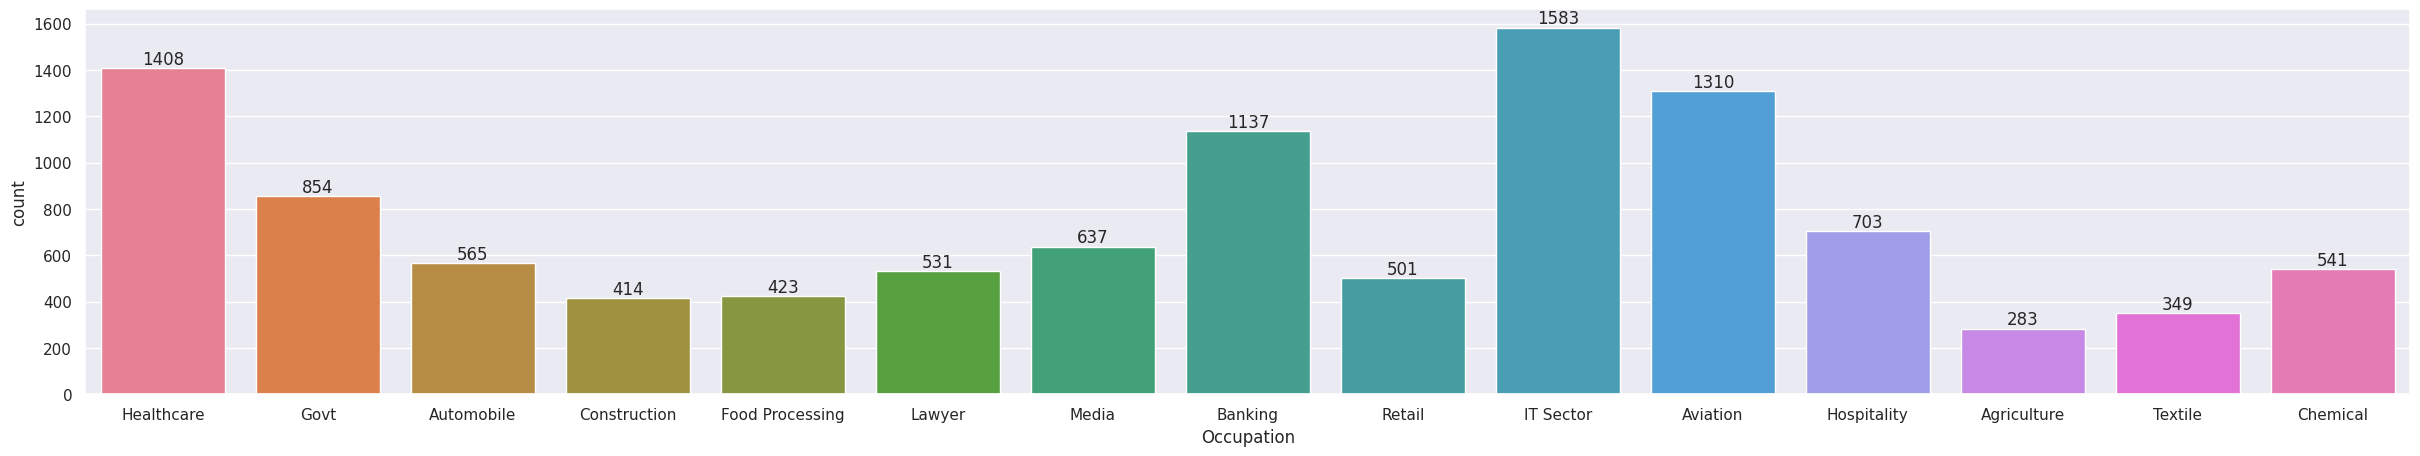

In [ ]:
ax=sns.countplot(data=df,x="Occupation",hue="Occupation")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

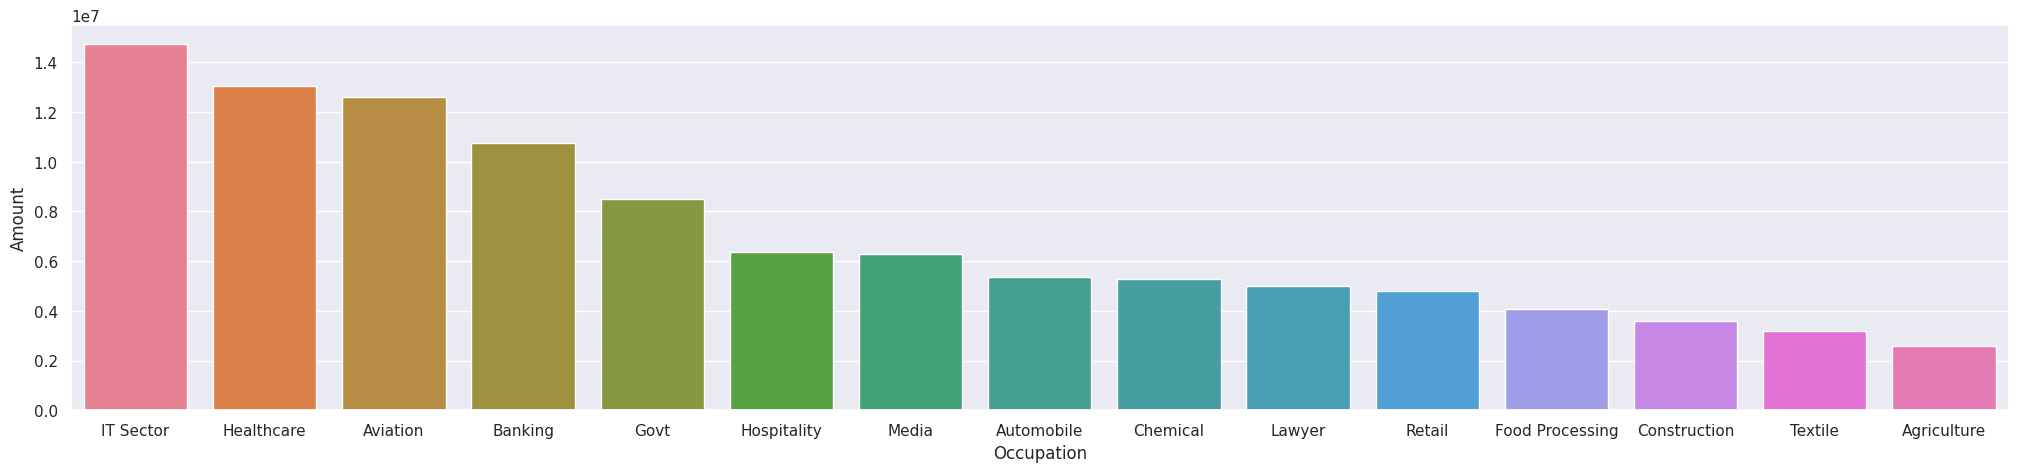

In [ ]:
sales_occ=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(x="Occupation",y="Amount",data=sales_occ,hue="Occupation")

<Axes: xlabel='Prod_Cat', ylabel='Orders'>

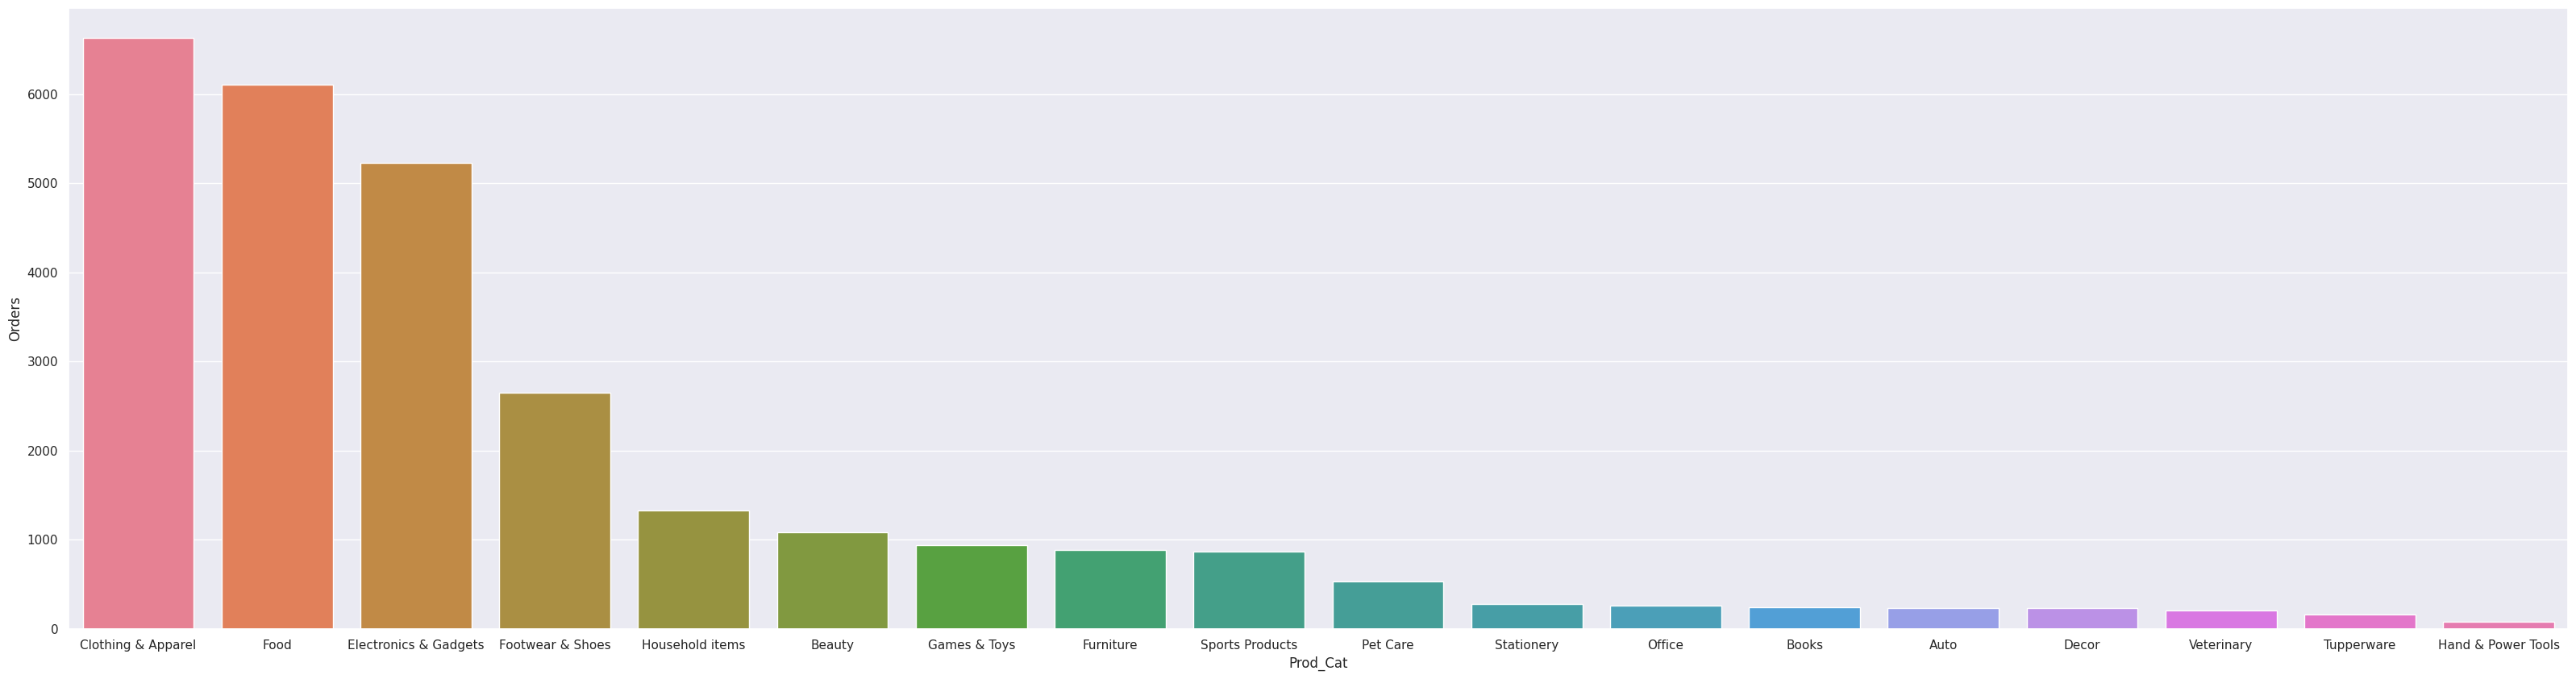

In [ ]:
sales_prodc=df.groupby(["Prod_Cat"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
sns.set(rc={"figure.figsize":(40,10)})
sns.barplot(x="Prod_Cat",y="Orders",data=sales_prodc,hue="Prod_Cat")

<Axes: xlabel='Prod_Cat', ylabel='Amount'>

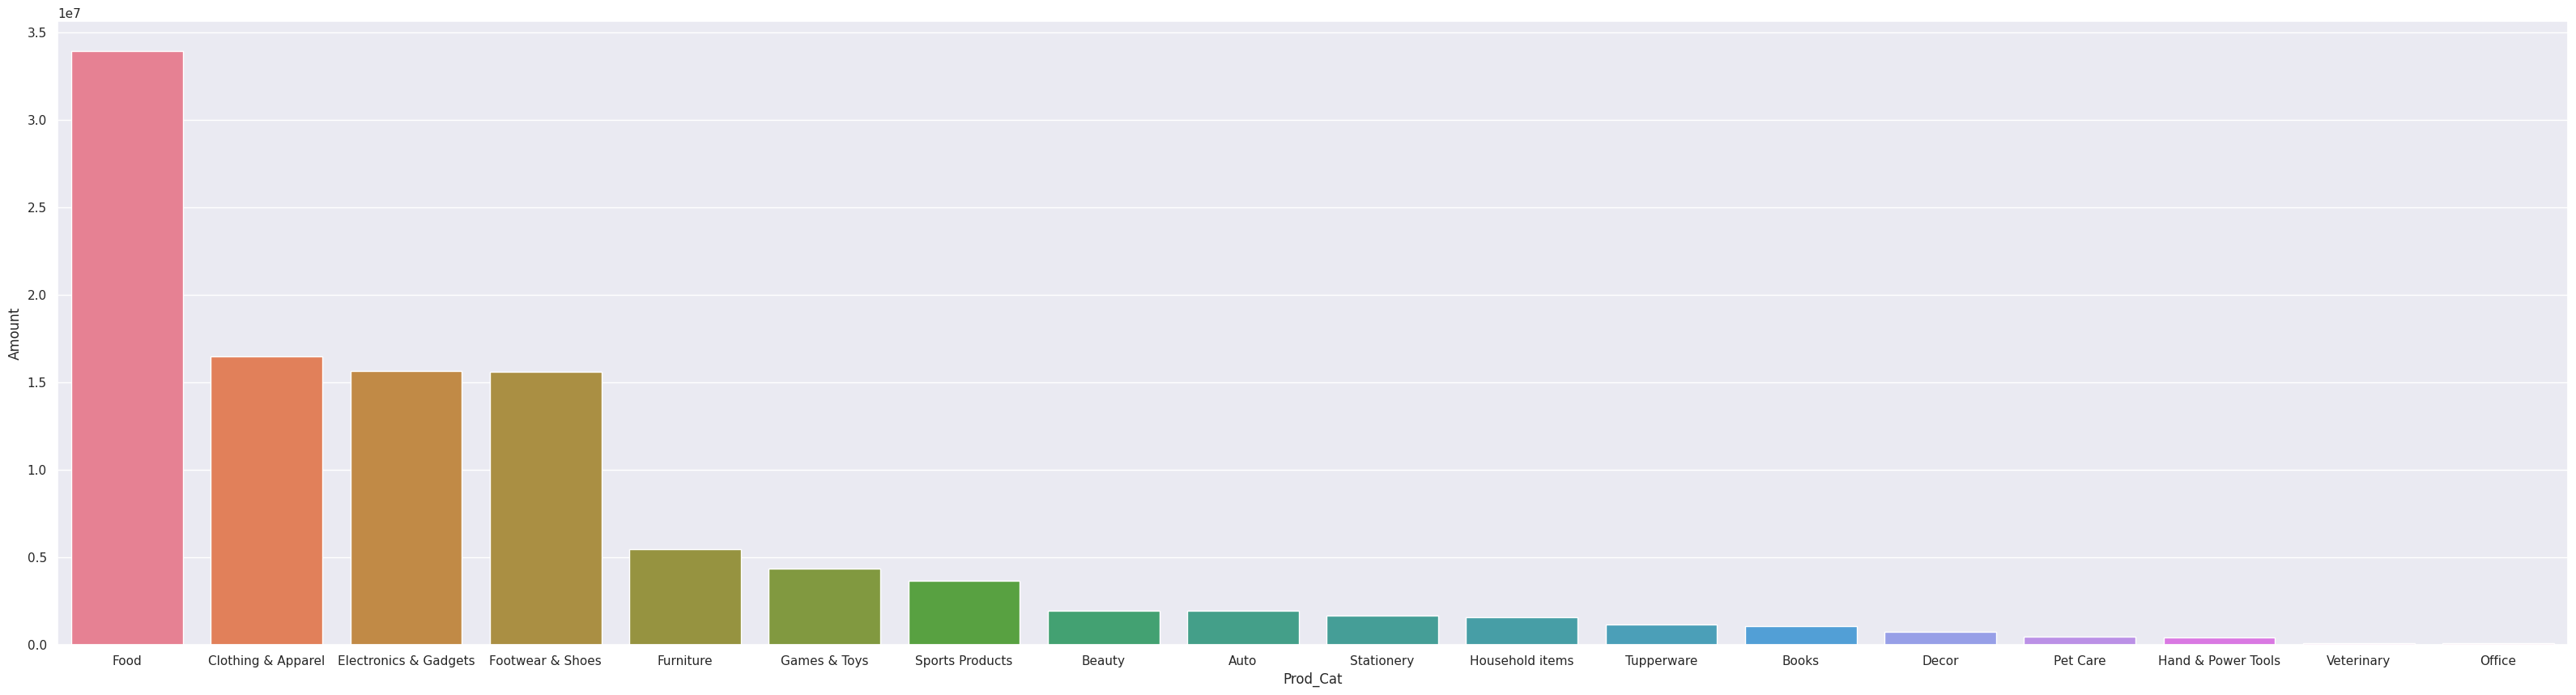

In [ ]:
sales_prodc=df.groupby(["Prod_Cat"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Prod_Cat",y="Amount",data=sales_prodc,hue="Prod_Cat")

<Axes: xlabel='Prod_ID', ylabel='Orders'>

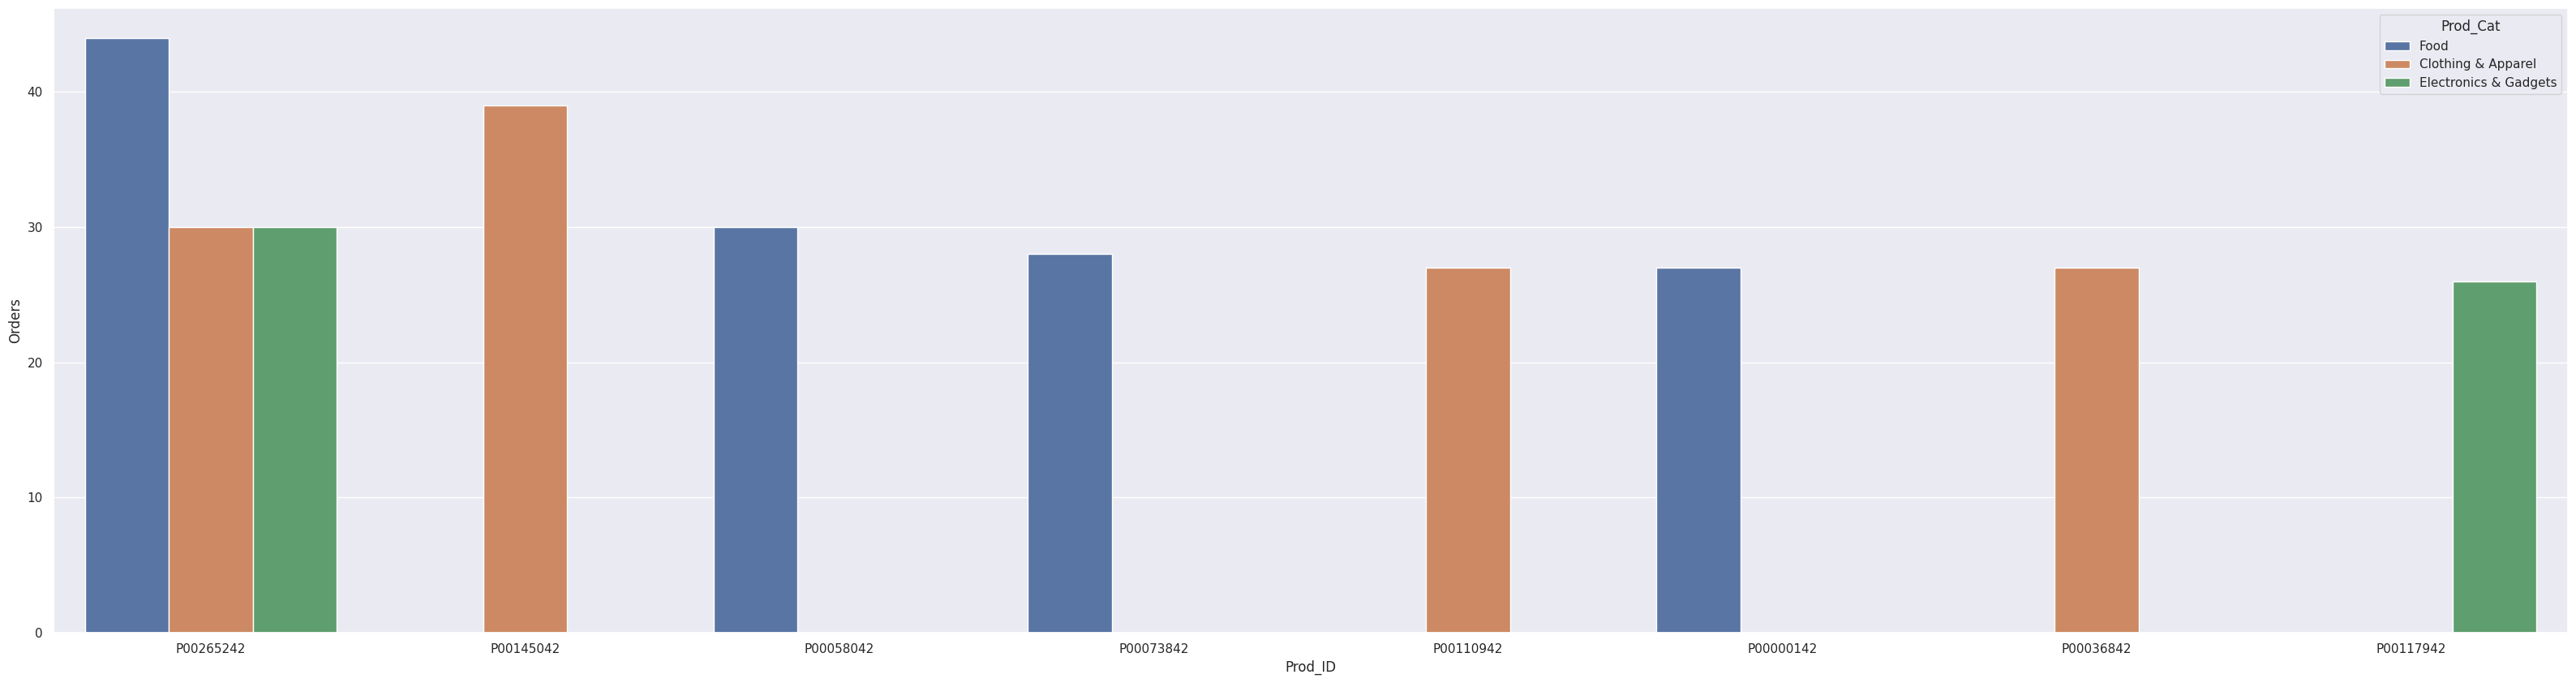

In [ ]:
sales_prod=df.groupby(["Prod_ID","Prod_Cat"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.barplot(x="Prod_ID",y="Orders",data=sales_prod,hue="Prod_Cat")

<Axes: xlabel='Prod_ID'>

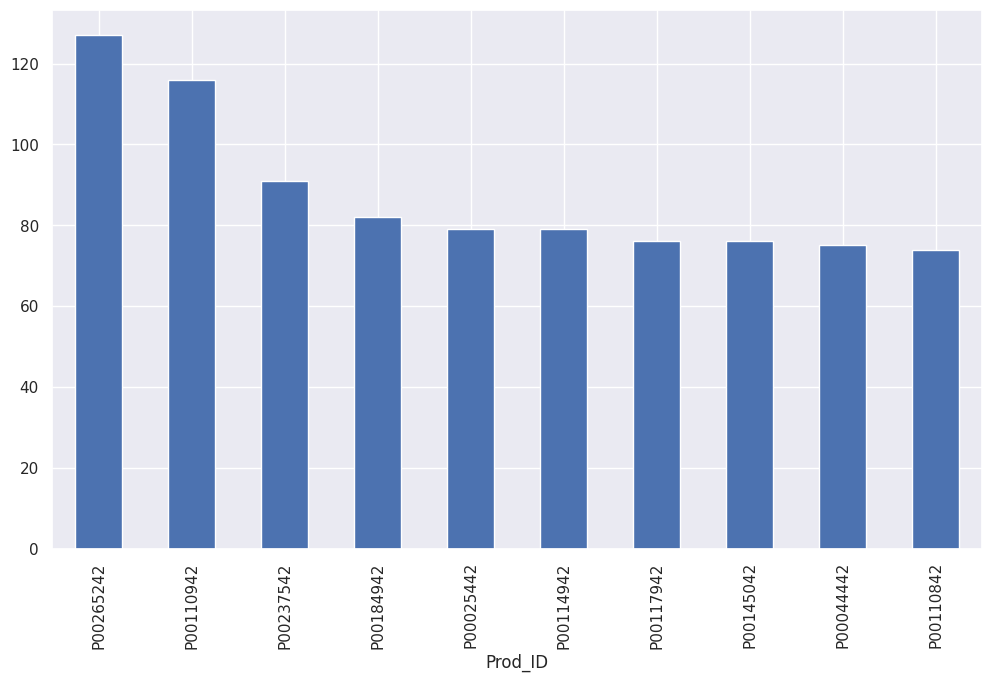

In [ ]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby("Prod_ID")["Orders"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")